# **Capstone Project: Predictive Modelling for COVID-19 in Public Health**

```
 By Toheebat Yewande



***OBJECTIVES***
- factors that influence transmission and patient outcomes
- predicting the spread of the virus (COVID-19 case counts)
- Provide actionable insights for resource allocation

**KEY QUESTIONS**
- How are cases growing regionally and globally?
- How accurate can we predict future cases?
- Which countries/regions are at higher risk based on the historical data?

Context from https://www.kaggle.com/datasets/imdevskp/corona-virus-report
- The virus has shown evidence of human-to-human transmission
- Transmission rate (rate of infection) appeared to escalate in mid-January 2020
- As of 30 January 2020, approximately 8,243 cases have been confirmed

# **IMPORT NECESSARY LIBRARIES**

In [1]:
#import necssary libraries

#For data manipulation
import pandas as pd
import numpy as np
import datetime

#for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#for model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prophet import Prophet

#  **LOAD DATASET**

ABOUT THE DATASET

- full_grouped.csv - Day to day country wise no. of cases
- Covid_19_clean_complete.csv - Day to day country wise no. of cases
- country_wise_latest.csv - Latest country level no. of cases
- day_wise.csv - Day wise no. of cases
- usa_county_wise.csv - Day to day county level no. of cases
- worldometer_data.csv - Latest data from https://www.worldometers.info/

In [2]:
#load 6 dataset
country_wise_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/country_wise_latest.csv')
covid_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/covid_19_clean_complete.csv')
day_wise_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/day_wise (1).csv')
full_grouped_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/full_grouped (1).csv')
usa_country_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/usa_county_wise.csv')
worldometer_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE DATASET/worldometer_data.csv')

print('Loaded successfully')

Loaded successfully


In [3]:
#function to check data

def wrangle(df):
  print(df.head())
  print("....................................................................")
  print(f'Shape: {df.shape}')
  print("....................................................................")
  print(df.info())
  print("....................................................................")
  print('Numerical summary')
  print(df.describe())
  print("....................................................................")
  print('Categorical summary')
  print(df.describe(include='object'))
  print("....................................................................")
  print("null count")
  print(df.isnull().sum())
  print("....................................................................")
  print('Duplicate count')
  print(df.duplicated().sum())
  print("....................................................................")
  print('Unique count')
  print(df.nunique())
  print("....................................................................")
  print('Columns')
  print(df.columns)

# **DATA PREPROCESSING**

**COVID DF**

In [4]:
#Checking covid dataset
wrangle(covid_df)

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
....................................................................
Shape: (49068, 10)
....................................................................
<class 'pandas.core.frame.DataFrame'>
RangeI

In [5]:
#Cleaning covid dataset

#date to datetime
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#fill missing values in Province/State column with unknown
covid_df['Province/State'].fillna('Unkown', inplace = True)

**COUNTRY WISE DF**

In [6]:
#checking data
wrangle(country_wise_df)

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

**DAY WISE DF**

In [7]:
wrangle(day_wise_df)

         Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2             

In [8]:
#cleaning data

#convert date to datetime
day_wise_df['Date'] = pd.to_datetime(day_wise_df['Date'])

**FULL GROUPED DF**

In [9]:
#checking full grouped df
wrangle(full_grouped_df)

         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
....................................................................
Shape: (35156, 10)
....................................................................
<class 'pandas.core.frame.DataFr

In [10]:
#data cleaning

#change date to datetime
full_grouped_df['Date'] = pd.to_datetime(full_grouped_df['Date'])

**WORLDOMETER DF**

In [11]:
#checking data

wrangle(worldometer_df)

  Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1   

In [12]:
# Drop rows where 'Continent' is missing
worldometer_df.dropna(subset=['Continent'], inplace=True)

# Fill missing values with column-wise logic
worldometer_df['NewCases'].fillna(worldometer_df['NewCases'].mean(), inplace=True)
worldometer_df['TotalDeaths'].fillna(worldometer_df['TotalDeaths'].median(), inplace=True)
worldometer_df['NewDeaths'].fillna(worldometer_df['NewDeaths'].mean(), inplace=True)
worldometer_df['TotalRecovered'].fillna(worldometer_df['TotalRecovered'].median(), inplace=True)
worldometer_df['NewRecovered'].fillna(worldometer_df['NewRecovered'].mean(), inplace=True)
worldometer_df['ActiveCases'].fillna(worldometer_df['ActiveCases'].mean(), inplace=True)
worldometer_df['Serious,Critical'].fillna(worldometer_df['Serious,Critical'].mean(), inplace=True)  # Consider renaming this column
worldometer_df['Tot Cases/1M pop'].fillna(worldometer_df['Tot Cases/1M pop'].mean(), inplace=True)
worldometer_df['Deaths/1M pop'].fillna(worldometer_df['Deaths/1M pop'].mean(), inplace=True)
worldometer_df['TotalTests'].fillna(worldometer_df['TotalTests'].median(), inplace=True)
worldometer_df['Tests/1M pop'].fillna(worldometer_df['Tests/1M pop'].mean(), inplace=True)

# Fill missing 'WHO Region' with 'unknown'
worldometer_df['WHO Region'].fillna('unknown', inplace=True)

#rename column
worldometer_df.rename(columns= {'Serious,Critical' : 'Serious_Critical'}, inplace = True)

# Verify that all missing values are handled
print(worldometer_df.isnull().sum())


Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious_Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64


**USA COUNTRY DF**

In [13]:
#checking data

wrangle(usa_country_df)

        UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2 

In [14]:
#cleaning data

#change date to datetime
usa_country_df['Date'] = pd.to_datetime(usa_country_df['Date'])

#fill missing values
usa_country_df['FIPS'].fillna(-1, inplace = True)
usa_country_df['Admin2'].fillna('unknown', inplace = True)

print(usa_country_df.isnull().sum())
print('Data types:')
print(usa_country_df.dtypes)

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64
Data types:
UID                        int64
iso2                      object
iso3                      object
code3                      int64
FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Lat                      float64
Long_                    float64
Combined_Key              object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
dtype: object


**MERGING DATA**

In [15]:
#Merge needed columns from different df with covid df as the base df

# Columns needed from country_wise_df: 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'New cases', 'New deaths', '1 week % increase'
country_columns = country_wise_df[['Country/Region', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'New cases', 'New deaths', '1 week % increase']]
merged_df = covid_df.merge(country_columns, on='Country/Region', how='inner')

# Columns needed from worldometer_df: 'Population', 'TotalTests', 'Tests/1M pop'
worldometer_columns = worldometer_df[['Country/Region', 'Population', 'TotalTests', 'Tests/1M pop', 'Continent']]
merged_df = merged_df.merge(worldometer_columns, on='Country/Region', how='inner')

merged_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Deaths / 100 Cases,Recovered / 100 Cases,New cases,New deaths,1 week % increase,Population,TotalTests,Tests/1M pop,Continent
0,Unkown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,3.50,69.49,106,10,2.07,39009447.0,90396.0,2317.000000,Asia
1,Unkown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2.95,56.25,117,6,17.00,2877470.0,38997.0,13553.000000,Europe
2,Unkown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,4.16,67.34,616,8,18.07,43926079.0,135702.0,83959.366492,Africa
3,Unkown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,5.73,88.53,10,0,2.60,77278.0,3750.0,48526.000000,Europe
4,Unkown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,4.32,25.47,18,1,26.84,32956300.0,64747.0,1965.000000,Africa


In [16]:
#checking the merged dataset
wrangle(merged_df)

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0         Unkown    Afghanistan  33.93911  67.709953 2020-01-22          0   
1         Unkown        Albania  41.15330  20.168300 2020-01-22          0   
2         Unkown        Algeria  28.03390   1.659600 2020-01-22          0   
3         Unkown        Andorra  42.50630   1.521800 2020-01-22          0   
4         Unkown         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  Deaths / 100 Cases  \
0       0          0       0  Eastern Mediterranean                3.50   
1       0          0       0                 Europe                2.95   
2       0          0       0                 Africa                4.16   
3       0          0       0                 Europe                5.73   
4       0          0       0                 Africa                4.32   

   Recovered / 100 Cases  New cases  New deaths  1 week % increase  \
0         

# **EXPLORATORY DATA ANALYSIS**

**OUTLIER DETECTION**

In [17]:
merged_df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,New cases,New deaths,1 week % increase,Population,TotalTests,Tests/1M pop
count,38164.000000,38164.000000,38164,3.816400e+04,38164.000000,3.816400e+04,38164.000000,38164.000000,38164.000000,38164.000000,38164.000000,38164.000000,3.816400e+04,3.816400e+04,38164.000000
mean,19.458479,12.124518,2020-04-24 12:00:00,1.457065e+04,723.608217,8.281002e+03,5566.035845,3.899901,58.988424,1020.847291,22.842365,13.187340,3.422684e+07,1.504305e+06,77170.562221
min,-42.882100,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000,0.000000,0.000000,0.000000,0.000000,-3.840000,3.393800e+04,1.200000e+02,4.000000
25%,3.919300,-55.765800,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000,1.090000,36.860000,7.000000,0.000000,2.960000,3.278650e+06,6.842300e+04,12230.000000
50%,17.900000,17.679100,2020-04-24 12:00:00,1.470000e+02,3.000000,1.800000e+01,50.000000,2.510000,64.270000,117.000000,1.000000,5.990000,1.168846e+07,2.854710e+05,59456.000000
75%,42.708678,45.079162,2020-06-10 06:00:00,2.260250e+03,51.000000,8.350000e+02,986.000000,5.030000,84.180000,655.000000,11.000000,17.390000,3.777502e+07,1.669996e+06,97348.000000
max,71.706900,178.065000,2020-07-27 00:00:00,2.442375e+06,87618.000000,1.846641e+06,583080.000000,28.560000,100.000000,44457.000000,637.000000,226.320000,1.381345e+09,2.971691e+07,995282.000000
std,26.588203,66.210603,NaN,7.918668e+04,3989.669476,5.205201e+04,26754.146367,4.145839,29.322071,3863.695777,88.148226,23.647061,1.031766e+08,3.117464e+06,116600.612922


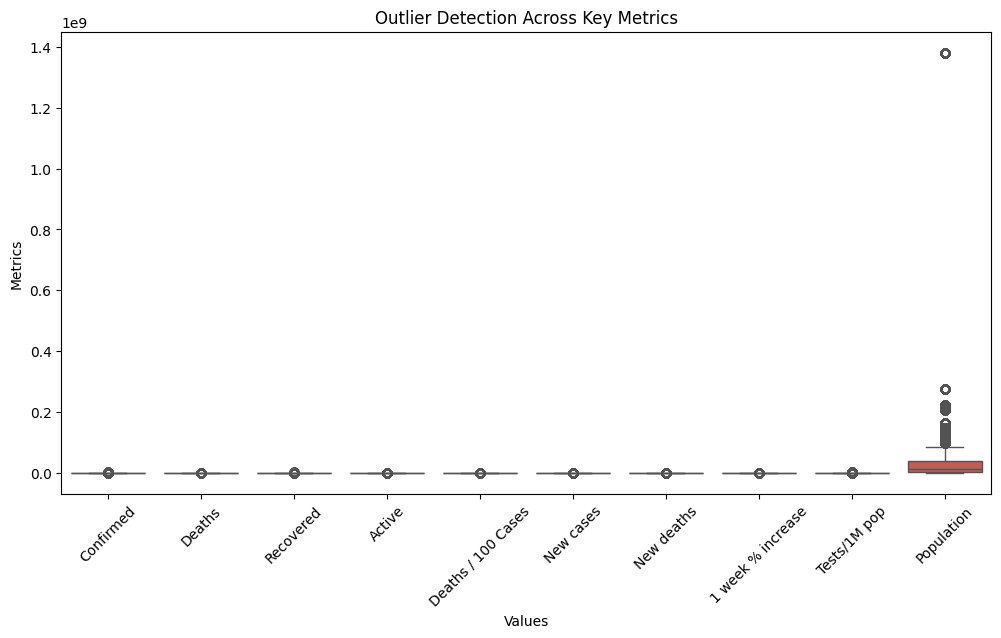

In [18]:
# Boxplot for outlier detection
Numerical_Columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Deaths / 100 Cases', 'New cases', 'New deaths', '1 week % increase', 'Tests/1M pop', 'Population']
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[Numerical_Columns], palette='coolwarm', orient='v')
plt.title("Outlier Detection Across Key Metrics")
plt.xlabel("Values")
plt.ylabel("Metrics")
plt.xticks(rotation=45)
plt.show()


In [19]:
# Identifying rows with potential outliers using IQR (Interquartile Range)
Q1 = merged_df['Population'].quantile(0.25)
Q3 = merged_df['Population'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with values outside the bounds for each column
merged_df = merged_df[~((merged_df['Population'] < lower_bound) | (merged_df['Population'] > upper_bound))]

In [20]:
# Verify if outliers have been removed
print(f"Shape of dataset after removing outliers: {merged_df.shape}")


Shape of dataset after removing outliers: (35720, 19)


# **FEATURE ENGINEERING**

In [21]:
merged_df['Month'] = pd.to_datetime(merged_df['Date']).dt.month
merged_df['Day'] = pd.to_datetime(merged_df['Date']).dt.day

In [22]:
#Daily growth rate
merged_df['Daily Growth Rate %'] = merged_df['New cases'] / (merged_df['Confirmed'] - merged_df['New cases'] + 1) * 100

# Mortality Ratio (Deaths / Total Cases)
merged_df['Mortality Ratio %'] = (merged_df['Deaths'] / (merged_df['Population'] + 1)) * 100

# Calculate Cases per Population (per 1 million)
merged_df['Cases Per Million'] = (merged_df['Confirmed'] / merged_df['Population']) * 1_000_000

#calculate solved cases
merged_df['Solved'] = merged_df['Recovered'] + merged_df['Deaths']


In [23]:
merged_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,...,Population,TotalTests,Tests/1M pop,Continent,Month,Day,Daily Growth Rate %,Mortality Ratio %,Cases Per Million,Solved
38159,Unkown,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,...,219544.0,3079.0,14025.000000,Africa,7,27,0.231481,0.006377,3939.984696,748
38160,Unkown,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,...,29886897.0,120.0,4.000000,Asia,7,27,0.594530,0.001616,56.579979,1316
38161,Unkown,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,...,871326.0,135702.0,83959.366492,Africa,7,27,0.000000,0.000803,406.277329,335
38162,Unkown,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,...,9557468.0,135702.0,83959.366492,Asia,7,27,0.597803,0.000628,756.999657,6088
38163,Unkown,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa,...,2143943.0,8771.0,4091.000000,Africa,7,27,0.000000,0.000560,235.547307,140


In [24]:
# Grouping different types of cases by date
casesByDate = merged_df.groupby("Date").agg({"Confirmed": "sum", "Recovered": "sum", "Deaths": "sum", "Active" : "sum", "Solved": "sum"})

# Displaying the first few rows of the grouped data to check
print(casesByDate)

            Confirmed  Recovered  Deaths   Active   Solved
Date                                                      
2020-01-22          2          0       0        2        0
2020-01-23          4          0       0        4        0
2020-01-24         10          0       0       10        0
2020-01-25         17          0       0       17        0
2020-01-26         25          2       0       23        2
...               ...        ...     ...      ...      ...
2020-07-23    5402154    3528448  246528  1627178  3774976
2020-07-24    5478455    3584087  248391  1645977  3832478
2020-07-25    5543278    3635081  250016  1658181  3885097
2020-07-26    5597114    3675456  251031  1670627  3926487
2020-07-27    5679750    3732368  253474  1693908  3985842

[188 rows x 5 columns]


In [25]:
CasesByContinent = merged_df.groupby(['Continent', 'Date']).agg({'Daily Growth Rate %': 'mean', 'Mortality Ratio %': 'mean','Cases Per Million': 'mean', 'Population': 'sum' }).reset_index()

# Sort by region and date to ensure we have the latest data
CasesByContinent = CasesByContinent.sort_values(by=['Continent', 'Date'], ascending=[True, True])

# Get the last row (latest data) for each region
CasesByContinent1 = CasesByContinent.groupby('Continent').tail(1)

# Reset index
CasesByContinent1.set_index('Continent', inplace=True)

CasesByContinent1

,Date,Daily Growth Rate %,Mortality Ratio %,Cases Per Million,Population
Continent,,,,,
Africa,2020-07-27,1.955128,0.001303,869.473622,7.913912e+08
Asia,2020-07-27,1.186215,0.004418,4898.334046,6.456249e+08
Australia/Oceania,2020-07-27,12.018765,0.000099,86.156624,2.190931e+08
Europe,2020-07-27,-5.980847,0.014796,2788.662983,1.243566e+09
North America,2020-07-27,-14.674339,0.003370,1263.904288,5.433274e+08
South America,2020-07-27,2.900732,0.017318,4907.784115,2.180969e+08


# **BASIC SUMMARY REPORT**

In [26]:
#Basic information
print('COVID-19 TOTAL REPORT')
print(f"Total Number of confirmed cases around the world: {casesByDate['Confirmed'].iloc[-1]}")
print(f"Total Number of death cases around the world: {casesByDate['Deaths'].iloc[-1]}")
print(f"Total Number of recovered cases around the world: {casesByDate['Recovered'].iloc[-1]}")
print(f"Total number of active cases around the world: {casesByDate['Active'].iloc[-1]}")
print(f"Total Number of solved cases around the world: {casesByDate['Solved'].iloc[-1]}")

COVID-19 TOTAL REPORT
Total Number of confirmed cases around the world: 5679750
Total Number of death cases around the world: 253474
Total Number of recovered cases around the world: 3732368
Total number of active cases around the world: 1693908
Total Number of solved cases around the world: 3985842


In [27]:
#Continent wise Report for Key Metrics
print('COVID-19 CONTINENT WISE KEY METRICS REPORT')

# Loop through the continent df
for continent in CasesByContinent.index:
    daily_growth_rate = CasesByContinent.loc[continent, 'Daily Growth Rate %']
    mortality_rate = CasesByContinent.loc[continent, 'Mortality Ratio %']
    cases_per_million = CasesByContinent.loc[continent, 'Cases Per Million']
    Population = CasesByContinent.loc[continent, 'Population']

    # Print the report for each region
    print(f"\nContinent: {continent}")
    print(f" Total Population: {Population:_}")
    print(f"  Daily Growth Rate %: {daily_growth_rate:.4f}")
    print(f"  Mortality Ratio %: {mortality_rate:.4f}")
    print(f"  Cases Per Million: {cases_per_million:.4f}")


Streaming output truncated to the last 5000 lines.
  Mortality Ratio %: 0.0007
  Cases Per Million: 753.5103

Continent: 295
 Total Population: 645_624_887.0
  Daily Growth Rate %: 158.5120
  Mortality Ratio %: 0.0007
  Cases Per Million: 792.6056

Continent: 296
 Total Population: 645_624_887.0
  Daily Growth Rate %: 63.8635
  Mortality Ratio %: 0.0007
  Cases Per Million: 826.4318

Continent: 297
 Total Population: 645_624_887.0
  Daily Growth Rate %: 37.6475
  Mortality Ratio %: 0.0008
  Cases Per Million: 863.8205

Continent: 298
 Total Population: 645_624_887.0
  Daily Growth Rate %: -60.9700
  Mortality Ratio %: 0.0008
  Cases Per Million: 897.1830

Continent: 299
 Total Population: 645_624_887.0
  Daily Growth Rate %: 41.0708
  Mortality Ratio %: 0.0008
  Cases Per Million: 937.3930

Continent: 300
 Total Population: 645_624_887.0
  Daily Growth Rate %: 33.1679
  Mortality Ratio %: 0.0008
  Cases Per Million: 977.2067

Continent: 301
 Total Population: 645_624_887.0
  Daily Grow

# **DATA VISUALIZATION**

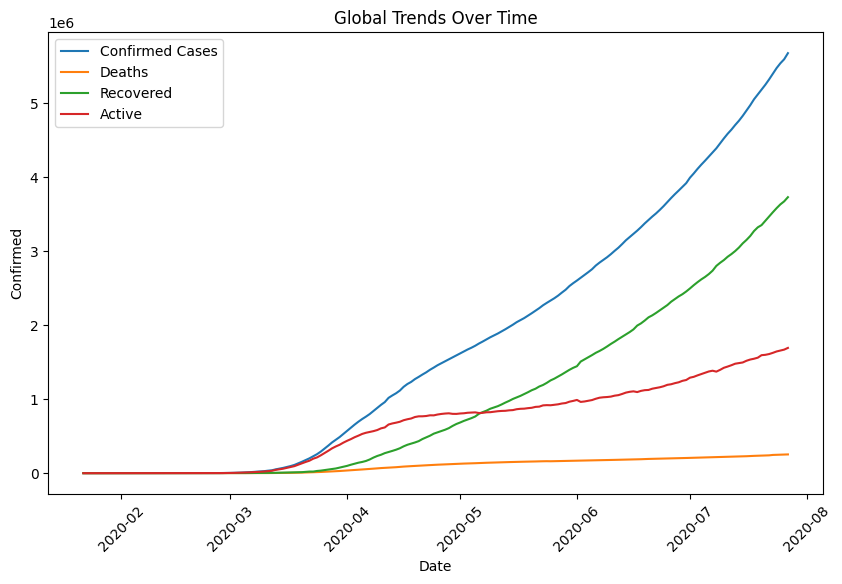

In [28]:
# Global Trends Over Time (Confirmed cases, Deaths, Recovered)
plt.figure(figsize=(10, 6))
sns.lineplot(data=casesByDate, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=casesByDate, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=casesByDate, x='Date', y='Recovered', label='Recovered')
sns.lineplot(data=casesByDate, x='Date', y='Active', label='Active')
plt.title('Global Trends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

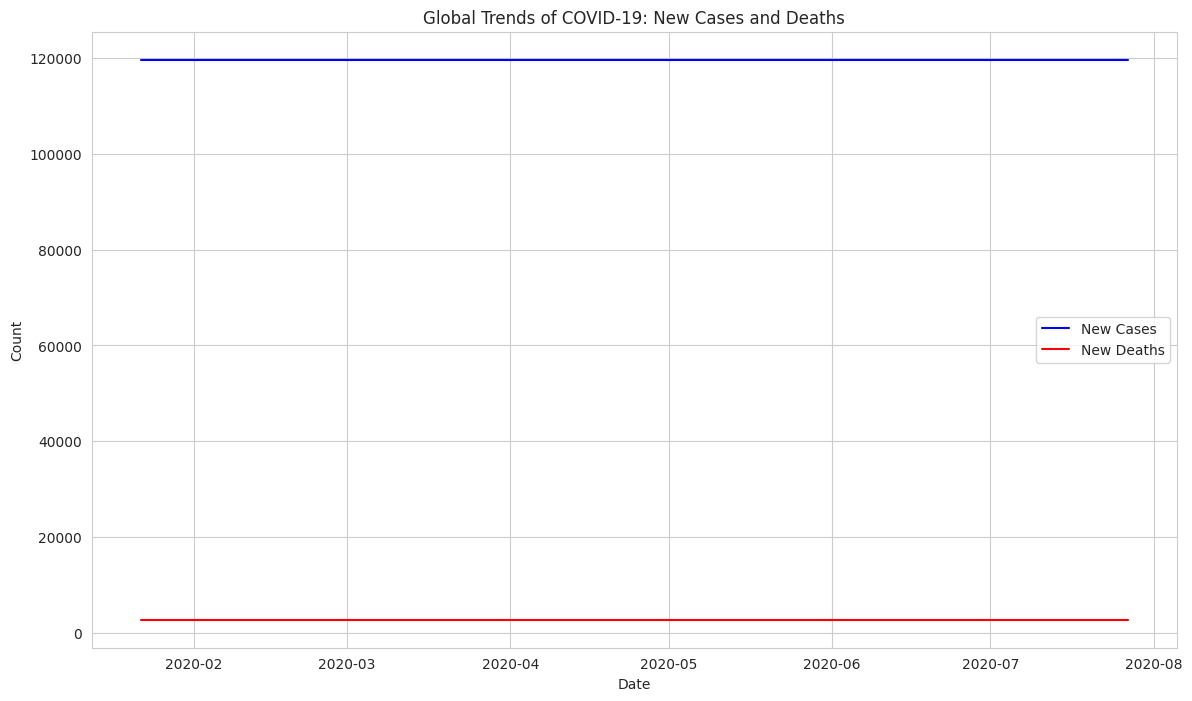

In [29]:
# Setting visualization styles
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))

#TREND OF NEW CASES, DEATHS, AND RECOVERIES (Global Level)
trend_data = merged_df.groupby('Date').agg({'New cases': 'sum','New deaths': 'sum'}).reset_index()
plt.figure(figsize=(14, 8))
plt.plot(trend_data['Date'], trend_data['New cases'], label="New Cases", color='blue')
plt.plot(trend_data['Date'], trend_data['New deaths'], label="New Deaths", color='red')
plt.title("Global Trends of COVID-19: New Cases and Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

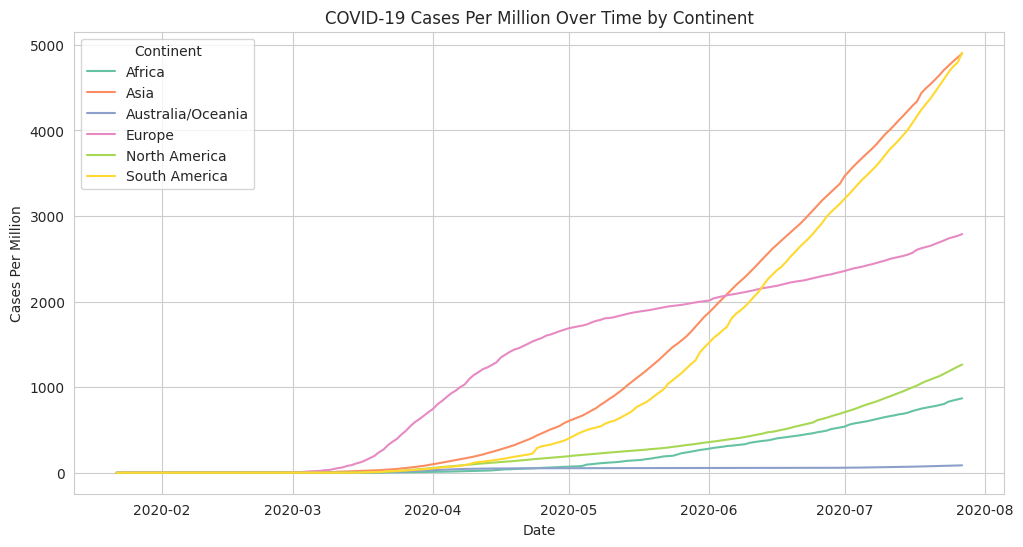

In [30]:
# CONTINENT-LEVEL ANALYSIS: CASES PER MILLION
# CASES PER MILLION OVER TIME
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
sns.lineplot(data=CasesByContinent, x='Date', y='Cases Per Million', hue='Continent', palette='Set2')
plt.title("COVID-19 Cases Per Million Over Time by Continent")
plt.xlabel("Date")
plt.ylabel("Cases Per Million")
plt.legend(title="Continent")
plt.show()

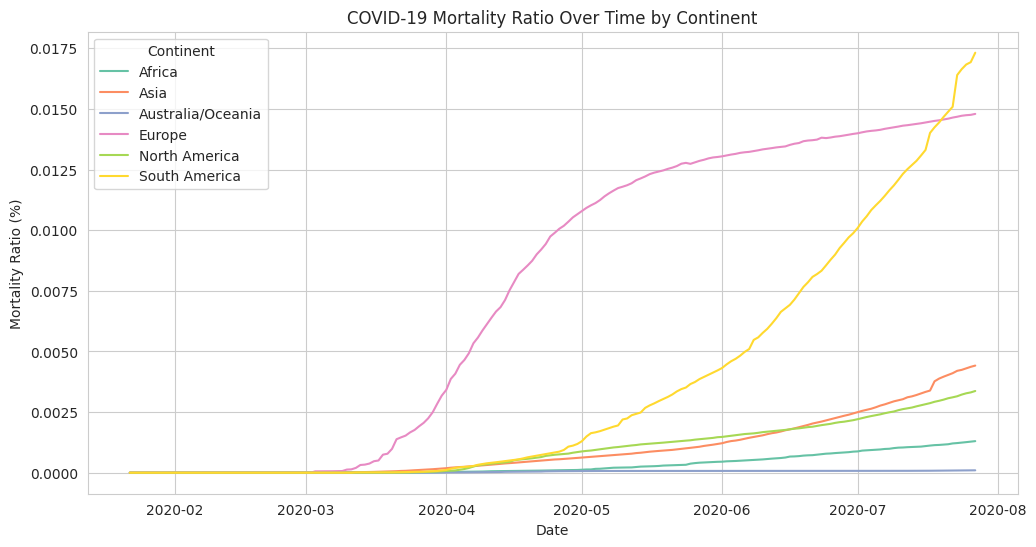

In [31]:
# MORTALITY RATIO OVER TIME
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
sns.lineplot(data=CasesByContinent, x='Date', y='Mortality Ratio %', hue='Continent', palette='Set2')
plt.title("COVID-19 Mortality Ratio Over Time by Continent")
plt.xlabel("Date")
plt.ylabel("Mortality Ratio (%)")
plt.legend(title="Continent")
plt.show()

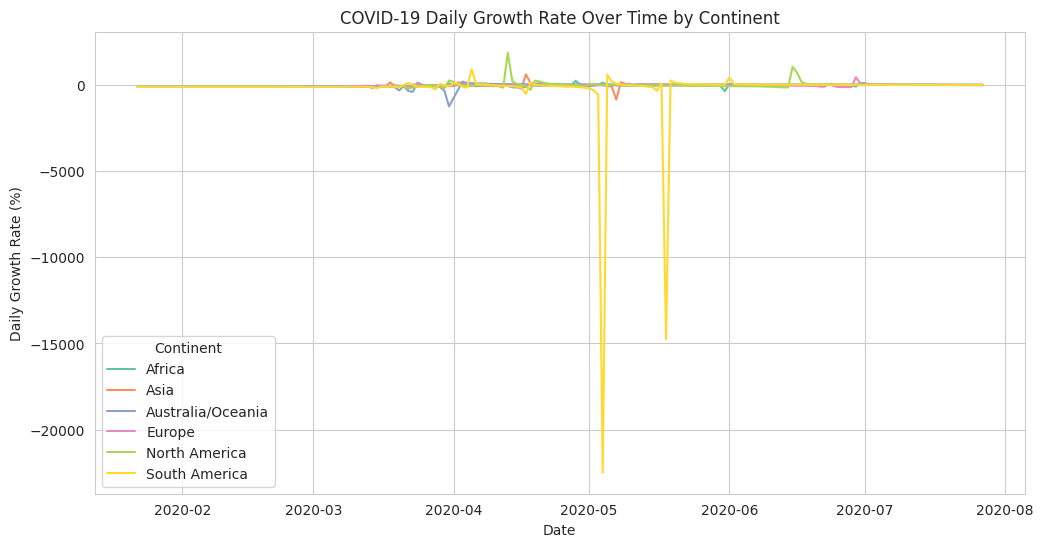

In [32]:
#DAILY GROWTH RATE OVER TIME
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
sns.lineplot(data=CasesByContinent, x='Date', y='Daily Growth Rate %', hue='Continent', palette='Set2')
plt.title("COVID-19 Daily Growth Rate Over Time by Continent")
plt.xlabel("Date")
plt.ylabel("Daily Growth Rate (%)")
plt.legend(title="Continent")
plt.show()

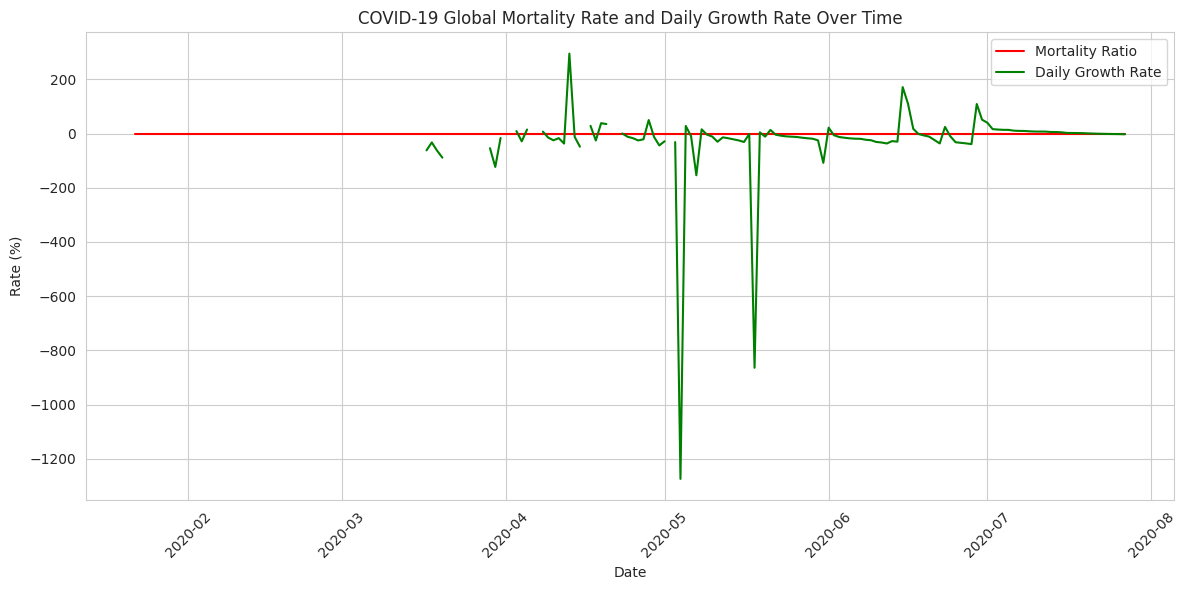

In [33]:
# Group by Date for the trends of Mortality and Growth Rates
rate_by_date = merged_df.groupby("Date")[["Mortality Ratio %", "Daily Growth Rate %"]].mean()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(rate_by_date.index, rate_by_date["Mortality Ratio %"], label="Mortality Ratio", color="red")
plt.plot(rate_by_date.index, rate_by_date["Daily Growth Rate %"], label="Daily Growth Rate", color="green")

plt.title("COVID-19 Global Mortality Rate and Daily Growth Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


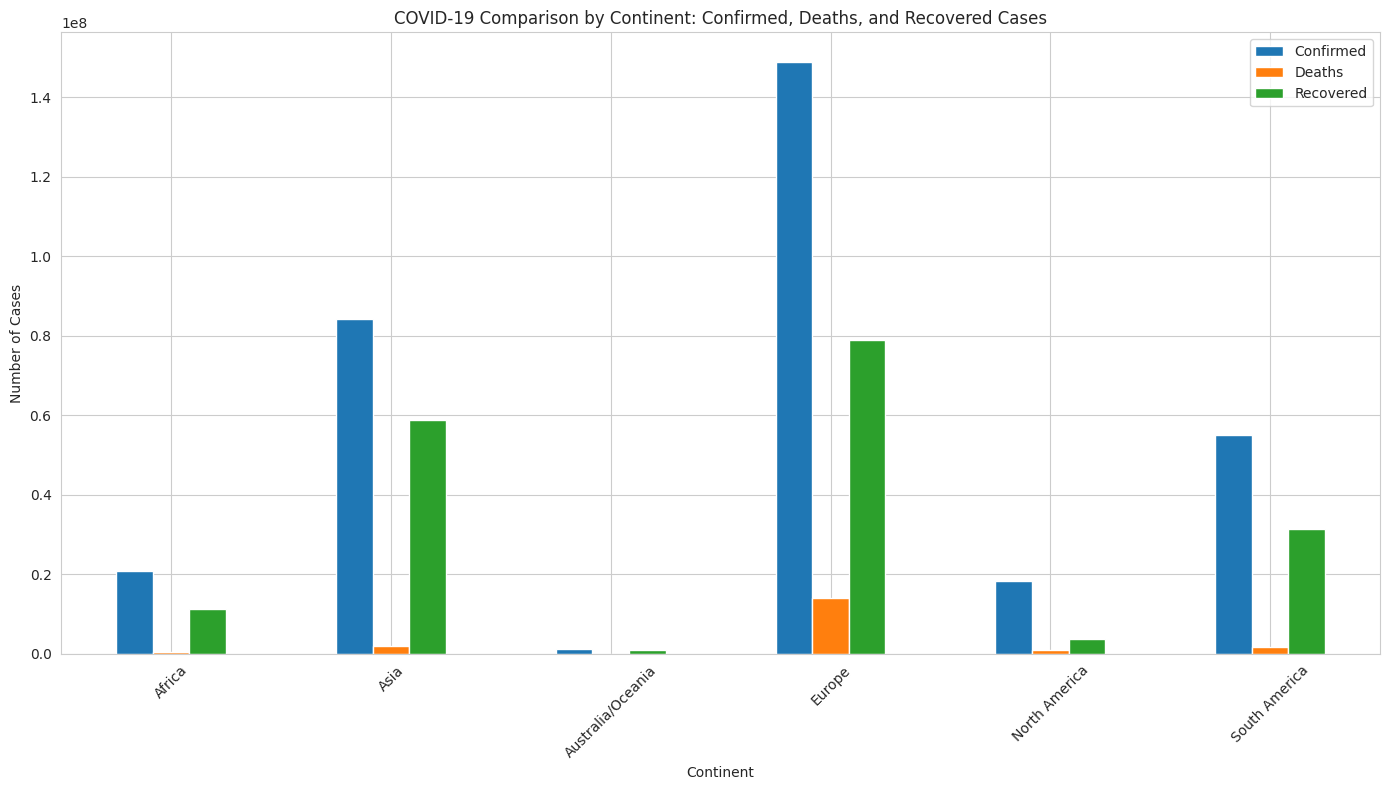

In [34]:
# Grouping data by continent
continent_summary = merged_df.groupby("Continent")[["Confirmed", "Deaths", "Recovered"]].sum()

# Plotting
continent_summary.plot(kind="bar", figsize=(14, 8))
plt.title("COVID-19 Comparison by Continent: Confirmed, Deaths, and Recovered Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

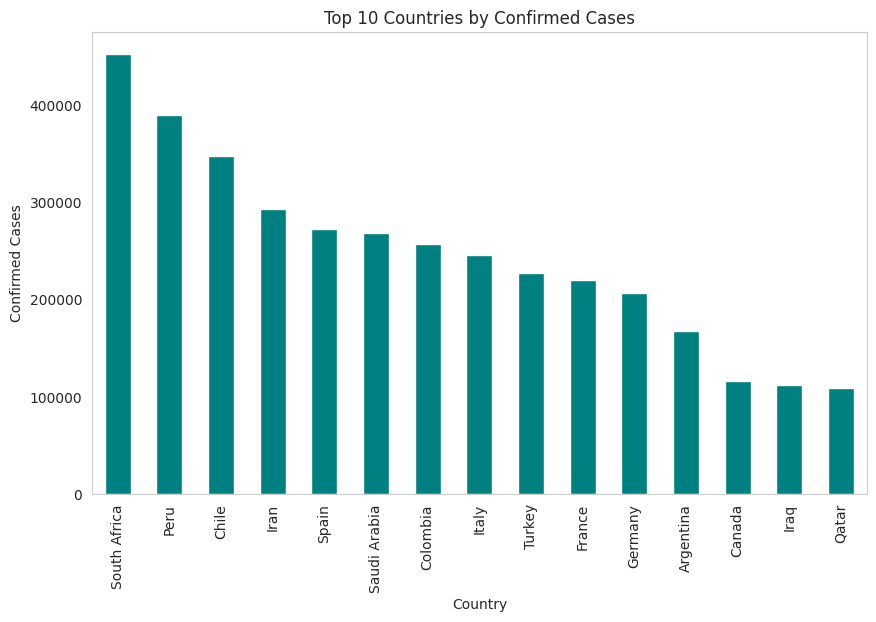

In [35]:
# Group by country to get the latest data
latest_data = merged_df[merged_df['Date'] == merged_df['Date'].max()]

# Top 10 countries by confirmed cases
top_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(15)

# Bar plot for top 10 countries
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.grid()
plt.show()


# **CORRELATION ANALYSIS**

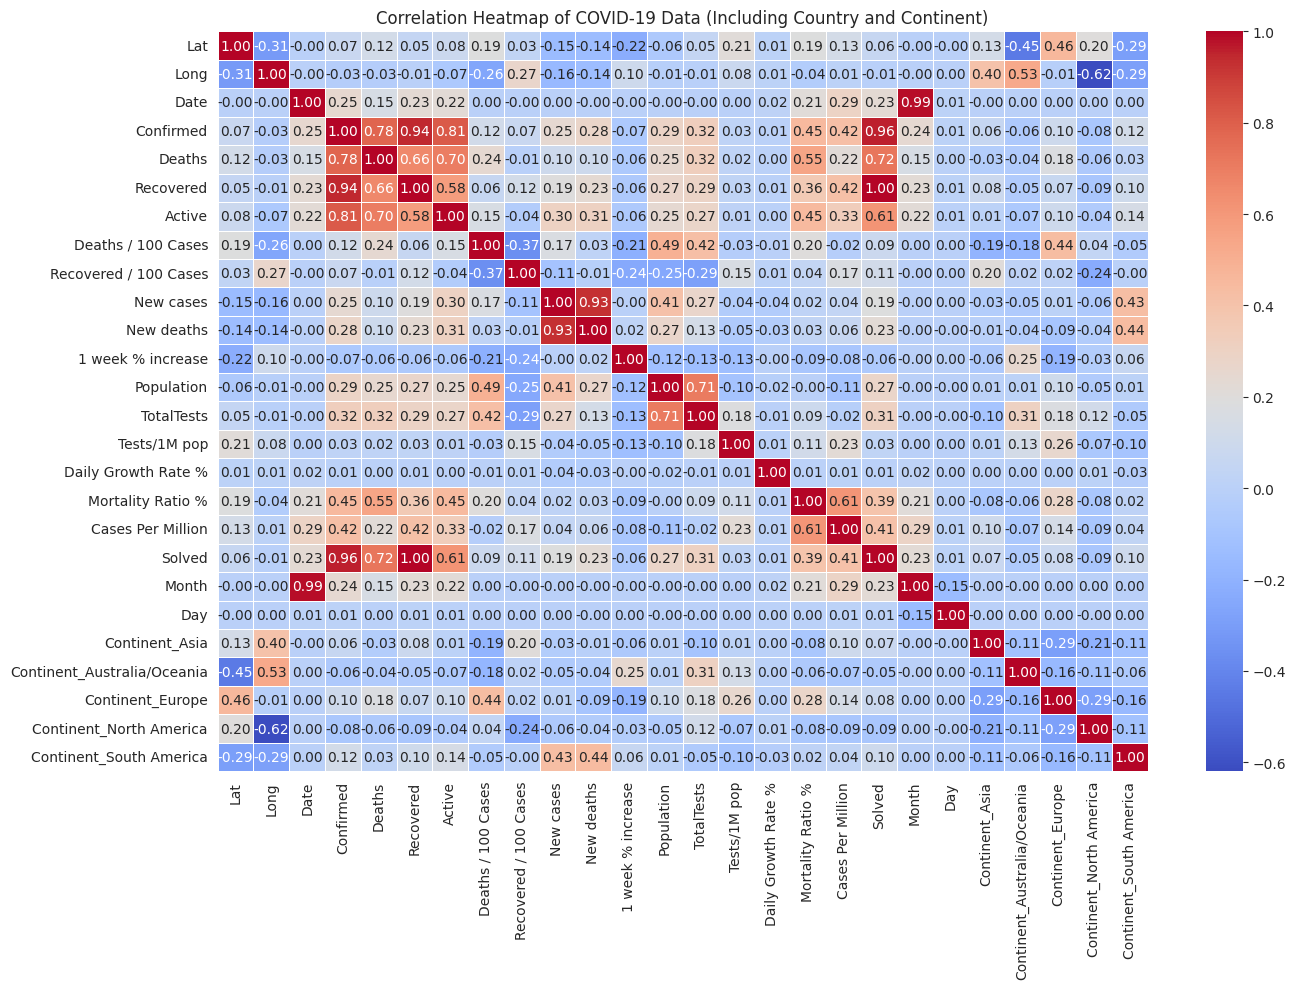

In [36]:
# Select relevant columns
relevant_columns = ['Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Deaths / 100 Cases','Recovered / 100 Cases', 'New cases', 'New deaths', '1 week % increase',
       'Population', 'TotalTests', 'Tests/1M pop', 'Continent','Daily Growth Rate %', 'Mortality Ratio %', 'Cases Per Million','Solved', 'Month', 'Day']

# Filter the dataframe to include only the relevant columns
merged_df_filtered = merged_df[relevant_columns]

# One-hot encoding for 'Country' and 'Continent'
merged_df_encoded = pd.get_dummies(merged_df_filtered, columns=[ 'Continent'], drop_first=True)

# Correlation Matrix for all numerical and encoded categorical variables
correlation_matrix = merged_df_encoded.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of COVID-19 Data (Including Country and Continent)")
plt.tight_layout()
plt.show()


In [37]:
correlation_matrix

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,New cases,...,Mortality Ratio %,Cases Per Million,Solved,Month,Day,Continent_Asia,Continent_Australia/Oceania,Continent_Europe,Continent_North America,Continent_South America
Lat,1.000000e+00,-3.129880e-01,-3.483286e-15,0.073556,0.120888,0.048382,0.084998,1.888603e-01,3.319417e-02,-1.502729e-01,...,0.186890,0.129220,0.058445,-2.905786e-15,-9.320677e-17,1.300917e-01,-4.457836e-01,4.567484e-01,1.987569e-01,-2.925479e-01
Long,-3.129880e-01,1.000000e+00,-1.393603e-16,-0.030551,-0.027240,-0.005415,-0.068941,-2.648215e-01,2.704904e-01,-1.585326e-01,...,-0.035936,0.008181,-0.008121,-3.272117e-16,3.481142e-18,4.000128e-01,5.311031e-01,-1.356502e-02,-6.197313e-01,-2.852111e-01
Date,-3.483286e-15,-1.393603e-16,1.000000e+00,0.249104,0.151654,0.230459,0.222076,5.472314e-16,-4.965337e-15,9.394977e-17,...,0.213750,0.294594,0.229512,9.871775e-01,9.879460e-03,-5.615856e-16,4.103106e-16,3.261694e-15,3.614889e-16,9.961324e-16
Confirmed,7.355634e-02,-3.055075e-02,2.491036e-01,1.000000,0.784682,0.944919,0.811423,1.181543e-01,7.092815e-02,2.455060e-01,...,0.450408,0.420927,0.959807,2.446135e-01,8.940535e-03,5.795181e-02,-6.175129e-02,9.566984e-02,-7.973586e-02,1.246072e-01
Deaths,1.208881e-01,-2.724044e-02,1.516540e-01,0.784682,1.000000,0.661209,0.698253,2.425575e-01,-6.816652e-03,9.650813e-02,...,0.548992,0.221270,0.723590,1.493186e-01,3.225837e-03,-3.387204e-02,-4.437446e-02,1.773174e-01,-5.789002e-02,2.559130e-02
Recovered,4.838159e-02,-5.415023e-03,2.304589e-01,0.944919,0.661209,1.000000,0.580734,6.285178e-02,1.249939e-01,1.908563e-01,...,0.358562,0.417186,0.996256,2.259985e-01,9.760001e-03,8.357276e-02,-4.990822e-02,6.613774e-02,-8.668698e-02,1.043930e-01
Active,8.499758e-02,-6.894078e-02,2.220764e-01,0.811423,0.698253,0.580734,1.000000,1.534032e-01,-3.852937e-02,3.010784e-01,...,0.446981,0.330458,0.614775,2.185651e-01,5.650378e-03,1.085961e-02,-6.725994e-02,9.957816e-02,-4.408892e-02,1.440119e-01
Deaths / 100 Cases,1.888603e-01,-2.648215e-01,5.472314e-16,0.118154,0.242557,0.062852,0.153403,1.000000e+00,-3.663119e-01,1.695648e-01,...,0.198688,-0.023571,0.085779,9.568945e-16,1.463361e-16,-1.907698e-01,-1.777944e-01,4.367427e-01,4.016048e-02,-4.680781e-02
Recovered / 100 Cases,3.319417e-02,2.704904e-01,-4.965337e-15,0.070928,-0.006817,0.124994,-0.038529,-3.663119e-01,1.000000e+00,-1.055404e-01,...,0.043585,0.169155,0.114216,-5.052506e-15,1.327270e-16,2.028745e-01,1.633779e-02,1.532602e-02,-2.395138e-01,-2.293190e-03
New cases,-1.502729e-01,-1.585326e-01,9.394977e-17,0.245506,0.096508,0.190856,0.301078,1.695648e-01,-1.055404e-01,1.000000e+00,...,0.020529,0.041362,0.186721,-7.408856e-17,1.236545e-17,-3.458270e-02,-5.146993e-02,1.067621e-02,-6.221679e-02,4.279452e-01


# **MODEL BUILDING FOR PREDICTION**

**FEATURE SELECTION**

In [38]:
# Drop features that can only be calculated after prediction or are irrelevant
columns_to_drop = ['Deaths / 100 Cases', 'Recovered / 100 Cases','Date', 'Recovered', 'Active', 'Solved']

merged_df_m = merged_df_encoded.drop(columns=columns_to_drop)

#Define features (X) and target (y)
X = merged_df_m.drop(columns=['Confirmed'])
y = merged_df_m['Confirmed']

**SPLITTING DATA INTO TRAINING AND TESTING DATA**

In [39]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [41]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**TRAINING AND TESTING MODEL WITH LINEAR REGRESSION**

In [42]:
#Build the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = model.predict(X_test_scaled)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 260657794.3692152
Mean Absolute Error: 6944.589817744103
R² Score: 0.7818131819534675


**TRAINING AND TESTING MODEL WITH RANDOM FOREST REGRESSOR**

In [43]:
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire training set and evaluate on the test set
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance on the test set
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the final test set evaluation metrics
print("\nRandom Forest Performance (Test Set):")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R² Score: {r2_test}")


Random Forest Performance (Test Set):
Mean Squared Error (MSE): 329080.3673578668
Mean Absolute Error (MAE): 104.2236058230683
R² Score: 0.9997245392242762


# **TIME SERIES ANALYSIS**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoh5w5q9p/i5_16hqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoh5w5q9p/50awdkhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13101', 'data', 'file=/tmp/tmpoh5w5q9p/i5_16hqe.json', 'init=/tmp/tmpoh5w5q9p/50awdkhy.json', 'output', 'file=/tmp/tmpoh5w5q9p/prophet_modelim466_nx/prophet_model-20241203000235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:02:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


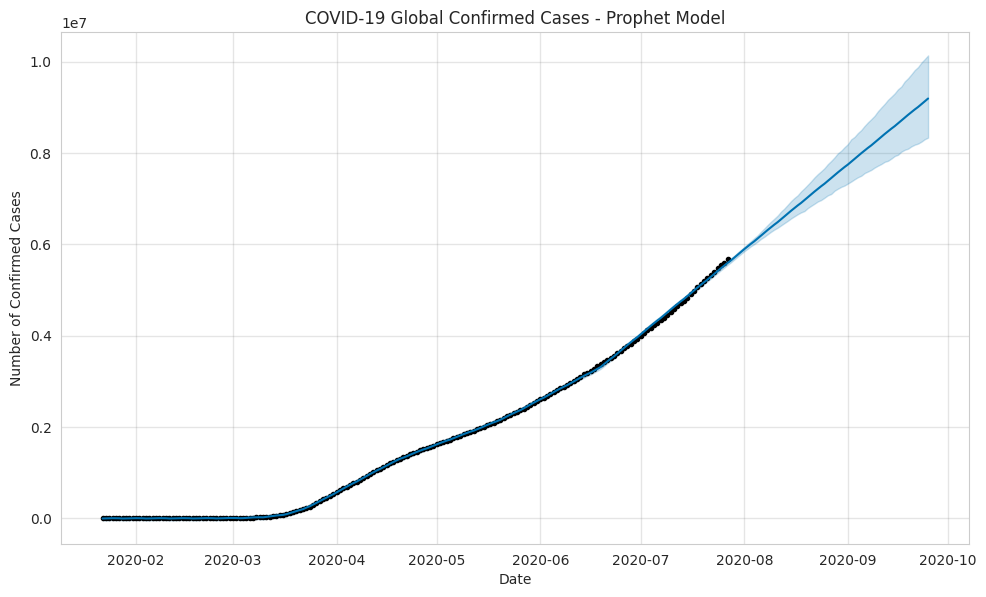

In [44]:
# group data
world_cases = merged_df_encoded.groupby('Date').agg({'Confirmed':'sum'}).reset_index()
world_cases = world_cases.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Instantiate the Prophet model
model = Prophet(interval_width=0.95)
model.fit(world_cases)

#Forecast for the next 60 days
future_dates = model.make_future_dataframe(periods=60)

# Forecast for the extended date
forecast = model.predict(future_dates)

# Plot Trends and forecasted
world_cases_forecast = model.plot(forecast)
plt.title('COVID-19 Global Confirmed Cases - Prophet Model')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()